In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
from streetstudy.common import utils
from streetstudy.common import display
from streetstudy.common import evaluation
from streetstudy.common import postprocess
from streetstudy.data import virat
from streetstudy.model import yolo

In [4]:
video_metadata = utils.get_video_metadata('/home/sardarchitect/datasets/virat/videos/VIRAT_S_010204_03_000606_000632.mp4')
print(video_metadata)

{'path': '/home/sardarchitect/datasets/virat/videos/VIRAT_S_010204_03_000606_000632.mp4', 'fps': 23.97, 'length': 400, 'height': 720, 'width': 1280}


In [5]:
def get_predictions(model, video_metadata):
    frame_iterator = utils.frame_generator(video_metadata['path'])
    for i in range(video_metadata['length']):
        if i >= 50:
            break
        frame = next(frame_iterator)
        model.predict(frame, i)
    return (frame, model.predictions)

In [6]:
model = yolo.YoloModel()
(frame, preds) = get_predictions(model, video_metadata)

Using cache found in /home/sardarchitect/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-6-3 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
def display_analysis(video_metadata, frame, current_frame_number, preds, analysis_type="None"):
    fig, ax = plt.subplots()
    ax.set(xlim=(0, video_metadata['width']), ylim=(video_metadata['height'], 0))    
    ax.set_axis_off()
    ax.set_facecolor('b')
    
    if analysis_type == 'heatmap':
        postprocess.heatmap(preds, current_frame_number, ax)
    if analysis_type == 'bounding_boxes':
        postprocess.bounding_boxes(preds, current_frame_number, ax)
    if analysis_type == 'directional_arrows':
        postprocess.directional_arrows(preds, current_frame_number, ax)
            
    ax.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

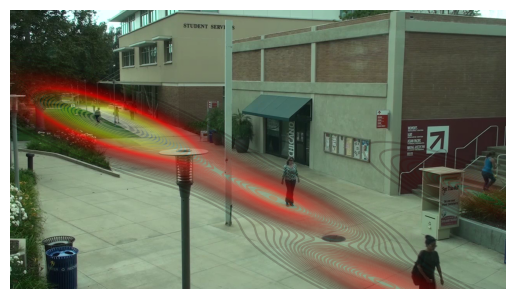

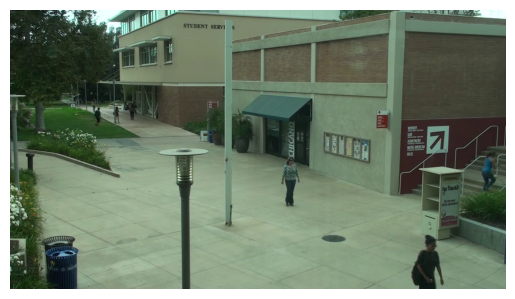

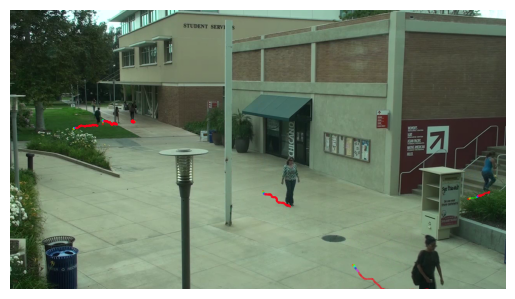

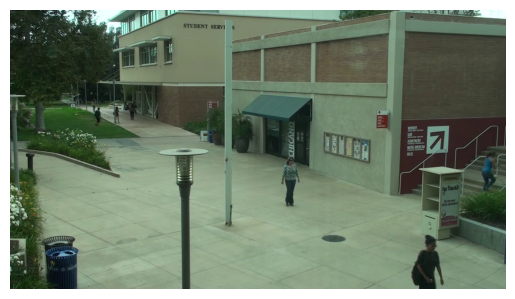

In [9]:
%matplotlib inline

display_analysis(
    video_metadata=video_metadata,
    frame=frame,
    current_frame_number=50,
    preds=preds,
    analysis_type="heatmap"
)
display_analysis(
    video_metadata=video_metadata,
    frame=frame,
    current_frame_number=50,
    preds=preds,
    analysis_type="bounding_boxes"
)
display_analysis(
    video_metadata=video_metadata,
    frame=frame,
    current_frame_number=50,
    preds=preds,
    analysis_type="directional_arrows"
)
display_analysis(
    video_metadata=video_metadata,
    frame=frame,
    current_frame_number=50,
    preds=preds,
    analysis_type="None"
)